In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [268]:
# np.random.seed(41)
x = np.random.randn(100,1)  
y = 3*x[:,0]**2 + 1 + np.random.rand(100)*2


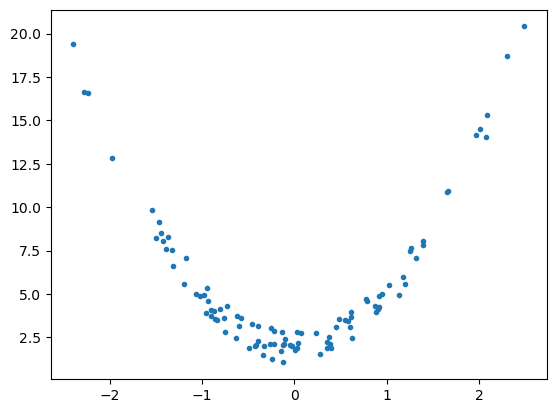

In [269]:
plt.plot(x,y,'.')

In [270]:
df = pd.DataFrame({
    'x' : x.reshape(100,),
    'y' : y.reshape(100,)
})

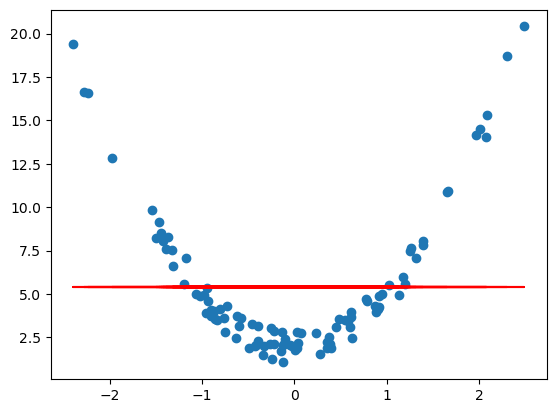

In [271]:
df['y_pred1'] = df['y'].mean()
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['y_pred1'],'red')
meann = df['y_pred1'][0]

In [272]:
df['resi_1'] = df['y'] - df['y_pred1']
df

,x,y,y_pred1,resi_1
0,-0.759149,3.597638,5.410713,-1.813075
1,-0.754528,2.789893,5.410713,-2.620821
2,-2.393286,19.395737,5.410713,13.985023
3,0.543439,3.477904,5.410713,-1.932810
4,0.236798,2.754133,5.410713,-2.656580
...,...,...,...,...
95,-1.978858,12.839466,5.410713,7.428752
96,-1.539049,9.862010,5.410713,4.451297
97,-0.326758,2.002135,5.410713,-3.408578
98,0.007798,1.765753,5.410713,-3.644960


In [273]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(max_leaf_nodes=8)
dt.fit(df[['x']] ,df['resi_1'] )
# np.array(df['x'])

DecisionTreeRegressor(max_leaf_nodes=8)

In [274]:
x_test = np.linspace(x.min(), x.max(),100)
y_pred2 = meann + dt.predict(x_test.reshape(-1,1))

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


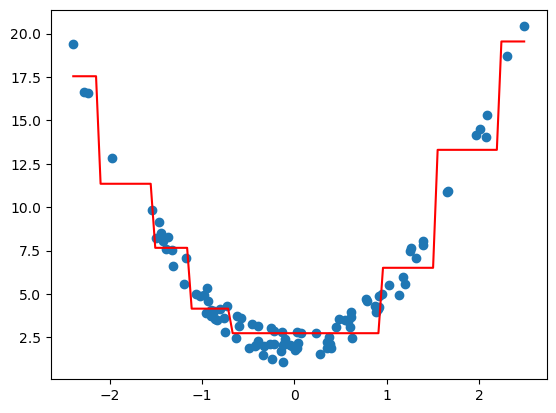

In [275]:

plt.scatter(df['x'],df['y'])
plt.plot(x_test,y_pred2,'red')
 

In [276]:
df['y_pred2'] = meann +  dt.predict(df[['x']])
df['resi_2'] = df['y'] - df['y_pred2']
df

,x,y,y_pred1,resi_1,y_pred2,resi_2
0,-0.759149,3.597638,5.410713,-1.813075,4.158339,-0.560701
1,-0.754528,2.789893,5.410713,-2.620821,4.158339,-1.368446
2,-2.393286,19.395737,5.410713,13.985023,17.543262,1.852474
3,0.543439,3.477904,5.410713,-1.932810,2.744628,0.733276
4,0.236798,2.754133,5.410713,-2.656580,2.744628,0.009505
...,...,...,...,...,...,...
95,-1.978858,12.839466,5.410713,7.428752,11.350738,1.488728
96,-1.539049,9.862010,5.410713,4.451297,11.350738,-1.488728
97,-0.326758,2.002135,5.410713,-3.408578,2.744628,-0.742493
98,0.007798,1.765753,5.410713,-3.644960,2.744628,-0.978875


In [277]:
from sklearn.tree import DecisionTreeRegressor


dt2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [278]:
dt2.fit(df[['x']],df['resi_2'])

DecisionTreeRegressor(max_leaf_nodes=8)

In [279]:
y_pred3 = meann + sum(d.predict(x_test.reshape(-1,1)) for d in [dt,dt2])

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


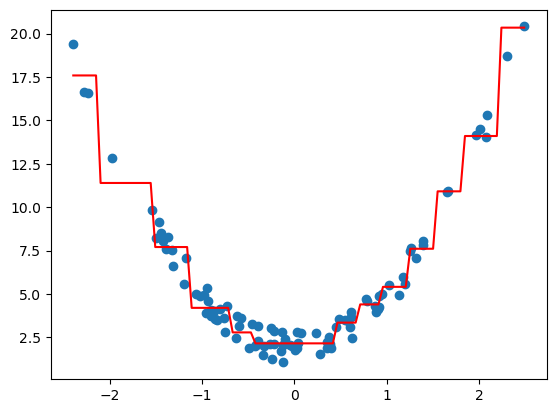

In [280]:
plt.scatter(df['x'],df['y'])
plt.plot(x_test,y_pred3,'red')

In [328]:
class GDB:
    def __init__(self,n_model = 5,learning_rate = 0.1) -> None:
        self.model = n_model
        self.Dt_model = []
        self.meann= 0
        self.lr = learning_rate
        pass
    def fit(self,x,y):
        x = np.array(x)
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        self.meann = y.mean()
        y_pred = np.full_like(y, self.meann, dtype=float)
         
        DT = []
        for i in range(self.model):
            resi = y - y_pred
            dt = DecisionTreeRegressor(max_leaf_nodes=8)
            dt.fit(x,resi)
            DT.append(dt)
            y_pred += self.lr *  dt.predict(x) 
        
        self.Dt_model  = DT
    def predict(self,x):
        x = np.array(x)
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        return self.meann + sum(self.lr * d.predict(x.reshape(-1,1)) for d in self.Dt_model)
    

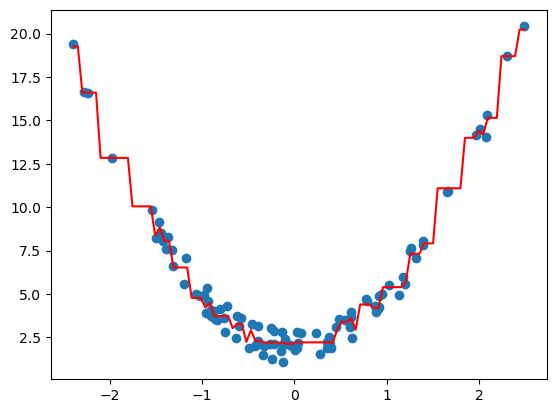

In [334]:
gb = GDB(n_model=10,learning_rate=0.5)
gb.fit(x,y)
y_p = gb.predict(x_test)
plt.scatter(x,y)
plt.plot(x_test,y_p,'red')